In [ ]:
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
original=pd.read_csv('/content/drive/MyDrive/Churn_Train (1).csv',delimiter=',')
print(original.head())

  state  account_length      area_code international_plan voice_mail_plan  \
0    NV           125.0  area_code_510                 no              no   
1    HI           108.0  area_code_415                 no              no   
2    DC            82.0  area_code_415                 no              no   
3    HI             NaN  area_code_408                 no             yes   
4    OH            83.0  area_code_415                 no              no   

   number_vmail_messages  total_day_minutes  total_day_calls  \
0                    0.0             2013.4             99.0   
1                    0.0              291.6             99.0   
2                    0.0              300.3            109.0   
3                   30.0              110.3             71.0   
4                    0.0              337.4            120.0   

   total_day_charge  total_eve_minutes  total_eve_calls  total_eve_charge  \
0             28.66             1107.6            107.0             14.93  

In [ ]:
df = pd.DataFrame(original)
columns_needed = df[['account_length','total_day_minutes','international_plan','total_day_calls','total_day_charge','total_eve_minutes','total_eve_calls','total_eve_charge','total_night_minutes','total_night_calls','total_night_charge','total_intl_minutes','total_intl_calls','total_intl_charge','number_customer_service_calls','churn' ]]
print(columns_needed)

      account_length  total_day_minutes international_plan  total_day_calls  \
0              125.0             2013.4                 no             99.0   
1              108.0              291.6                 no             99.0   
2               82.0              300.3                 no            109.0   
3                NaN              110.3                 no             71.0   
4               83.0              337.4                 no            120.0   
...              ...                ...                ...              ...   
3328           144.0              106.4                 no            109.0   
3329            69.0              155.0                 no             98.0   
3330             NaN              174.5                 no             98.0   
3331            39.0             2039.6                 no             68.0   
3332            41.0              202.9                 no             97.0   

      total_day_charge  total_eve_minutes  total_ev

In [ ]:
columns_needed.isnull().sum()

account_length                   501
total_day_minutes                200
international_plan                 0
total_day_calls                  200
total_day_charge                 200
total_eve_minutes                301
total_eve_calls                  200
total_eve_charge                 200
total_night_minutes              200
total_night_calls                  0
total_night_charge               200
total_intl_minutes               200
total_intl_calls                 301
total_intl_charge                200
number_customer_service_calls    200
churn                              0
dtype: int64

In [ ]:
columns_needed['account_length'] = columns_needed['account_length'].fillna(columns_needed['account_length'].median())
columns_needed['total_day_minutes'] = columns_needed['total_day_minutes'].fillna(columns_needed['total_day_minutes'].median())
columns_needed['total_day_calls'] = columns_needed['total_day_calls'].fillna(columns_needed['total_day_calls'].median())
columns_needed['total_eve_minutes'] = columns_needed['total_eve_minutes'].fillna(columns_needed['total_eve_minutes'].median())
columns_needed['total_eve_calls'] = columns_needed['total_eve_calls'].fillna(columns_needed['total_eve_calls'].median())
columns_needed['total_eve_charge'] = columns_needed['total_eve_charge'].fillna(columns_needed['total_eve_charge'].median())
columns_needed['total_night_minutes'] = columns_needed['total_night_minutes'].fillna(columns_needed['total_night_minutes'].median())
columns_needed['total_night_charge'] = columns_needed['total_night_charge'].fillna(columns_needed['total_night_charge'].median())
columns_needed['total_intl_minutes'] = columns_needed['total_intl_minutes'].fillna(columns_needed['total_intl_minutes'].median())
columns_needed['total_intl_calls'] = columns_needed['total_intl_calls'].fillna(columns_needed['total_intl_calls'].median())
columns_needed['total_intl_charge'] = columns_needed['total_intl_charge'].fillna(columns_needed['total_intl_charge'].median())
columns_needed['number_customer_service_calls'] = columns_needed['number_customer_service_calls'].fillna(columns_needed['number_customer_service_calls'].median())
columns_needed['total_day_charge'] = columns_needed['total_day_charge'].fillna(columns_needed['total_day_charge'].median())

<ipython-input-7-8622b7bbfd6c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  columns_needed['account_length'] = columns_needed['account_length'].fillna(columns_needed['account_length'].median())
<ipython-input-7-8622b7bbfd6c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  columns_needed['total_day_minutes'] = columns_needed['total_day_minutes'].fillna(columns_needed['total_day_minutes'].median())
<ipython-input-7-8622b7bbfd6c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

In [ ]:
columns_needed.isnull().sum()

account_length                   0
total_day_minutes                0
international_plan               0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

In [ ]:
columns_needed["churn"] =columns_needed["churn"].astype('category')
columns_needed["churn"] = columns_needed["churn"].cat.codes
columns_needed["international_plan"] =columns_needed["international_plan"].astype('category')
columns_needed["international_plan"] = columns_needed["international_plan"].cat.codes

<ipython-input-9-1a8b6e7c1c87>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  columns_needed["churn"] =columns_needed["churn"].astype('category')
<ipython-input-9-1a8b6e7c1c87>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  columns_needed["churn"] = columns_needed["churn"].cat.codes
<ipython-input-9-1a8b6e7c1c87>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: htt

In [ ]:
print(columns_needed.head())

   account_length  total_day_minutes  international_plan  total_day_calls  \
0           125.0             2013.4                   0             99.0   
1           108.0              291.6                   0             99.0   
2            82.0              300.3                   0            109.0   
3           100.0              110.3                   0             71.0   
4            83.0              337.4                   0            120.0   

   total_day_charge  total_eve_minutes  total_eve_calls  total_eve_charge  \
0             28.66             1107.6            107.0             14.93   
1             49.57              221.1             93.0             18.79   
2             51.05              181.0            100.0             15.39   
3             18.75              182.4            108.0             15.50   
4             57.36              227.4            116.0             19.33   

   total_night_minutes  total_night_calls  total_night_charge  \
0        

In [ ]:
correlation_matrix = columns_needed.corr()
corr=correlation_matrix["churn"]
corr

account_length                   0.006978
total_day_minutes               -0.011665
international_plan               0.259852
total_day_calls                  0.018710
total_day_charge                 0.197570
total_eve_minutes               -0.010508
total_eve_calls                  0.001926
total_eve_charge                 0.095518
total_night_minutes              0.037572
total_night_calls                0.006141
total_night_charge               0.037574
total_intl_minutes               0.062908
total_intl_calls                -0.047479
total_intl_charge                0.062924
number_customer_service_calls    0.200128
churn                            1.000000
Name: churn, dtype: float64

In [ ]:
columns_needed.dtypes

account_length                   float64
total_day_minutes                float64
international_plan                  int8
total_day_calls                  float64
total_day_charge                 float64
total_eve_minutes                float64
total_eve_calls                  float64
total_eve_charge                 float64
total_night_minutes              float64
total_night_calls                  int64
total_night_charge               float64
total_intl_minutes               float64
total_intl_calls                 float64
total_intl_charge                float64
number_customer_service_calls    float64
churn                               int8
dtype: object

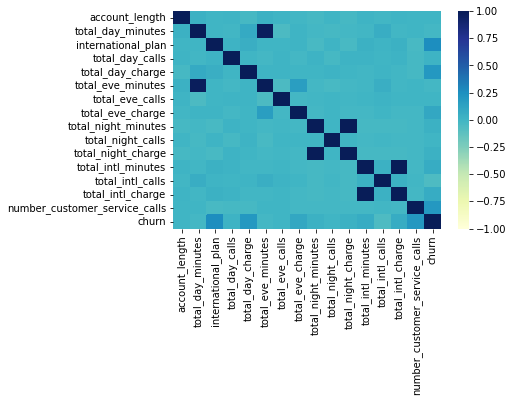

In [ ]:
import seaborn as sb
sb.heatmap(columns_needed.corr(),vmin=-1,vmax=1,cmap="YlGnBu")

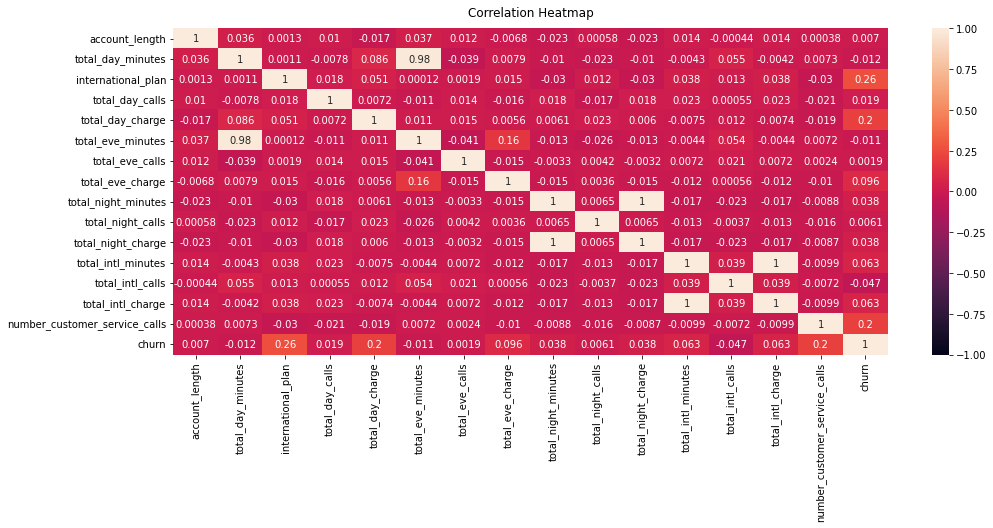

In [ ]:
plt.figure(figsize=(16, 6))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(columns_needed.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [ ]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(columns_needed.corr()[['Churn']].sort_values(by='Churn', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Churn', fontdict={'fontsize':18}, pad=16);

KeyError: ignored

<Figure size 576x864 with 0 Axes>

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [ ]:
X = columns_needed.drop("churn", axis=1)
X = X.values 
y = columns_needed["churn"]
y = y.values
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.3, random_state = 100)

In [ ]:
feature_cols = ['account_length','total_day_minutes','total_day_calls','total_day_charge','total_eve_minutes','total_eve_calls','total_eve_charge','total_night_minutes','total_night_calls','total_night_charge','total_intl_minutes','total_intl_calls','total_intl_charge','number_customer_service_calls']

In [ ]:
# Create Decision Tree classifer object
from sklearn import tree
clf = tree.DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [ ]:
# Create Decision Tree classifier object
from sklearn import metrics
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifier
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.884318766066838


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[1953,   48],
       [ 222,  111]])

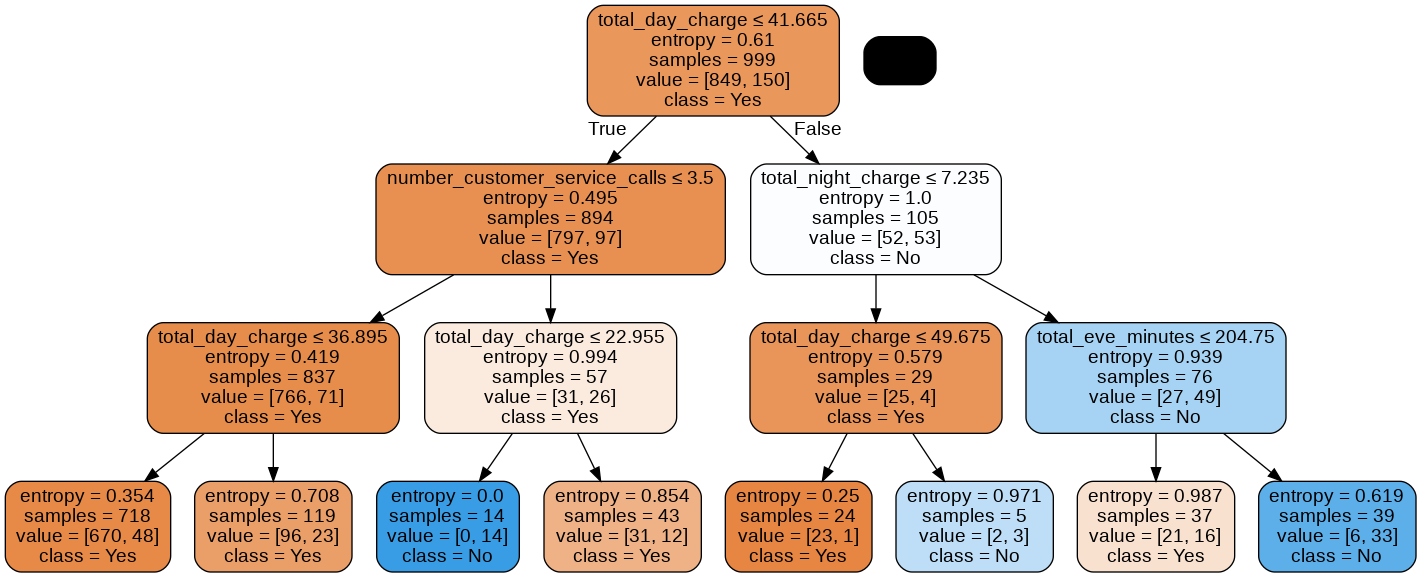

In [ ]:
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['Yes','No'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [ ]:
diff=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
diff

,Actual Value,Predicted Value,Difference
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
...,...,...,...
2329,0,0,0
2330,0,0,0
2331,0,0,0
2332,0,0,0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pred_df=pd.read_csv('/content/drive/MyDrive/Ba_data.csv',delimiter=',')
print(pred_df.head())

  state  account_length      area_code interantional_plans voice_mail_plan  \
0    UT              93  area_code_415                  no              no   
1    SD              39  area_code_408                  no              no   
2    KY             124  area_code_408                  no              no   
3    MS             162  area_code_415                 yes              no   
4    AK             112  area_code_415                  no             yes   

   number_vmail_messages  total_day_minutes  total_day_calls  \
0                      0              174.1              127   
1                      0              179.0               88   
2                      0              156.9               74   
3                      0              172.1              138   
4                     31              142.9               92   

   total_day_charge  total_eve_minutes  total_eve_calls  total_eve_charge  \
0             29.60              176.8               73             1

In [ ]:
columns_needed1 = pred_df[['account_length','total_day_minutes','total_day_calls','total_day_charge','total_eve_minutes','total_eve_calls','total_eve_charge','total_night_minutes','total_night_calls','total_night_charge','total_intl_minutes','total_intl_calls','total_intl_charge','number_customer_service_calls' ]]

In [ ]:
columns_needed1.isnull().sum()

account_length                   0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
dtype: int64

In [ ]:
# get prediction for new input
churn_pred = clf.predict(columns_needed1)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [ ]:
print(churn_pred)

[0 0 0 ... 0 0 0]


In [ ]:
print(columns_needed1.head(20),churn_pred[0:20])

    account_length  total_day_minutes  total_day_calls  total_day_charge  \
0               93              174.1              127             29.60   
1               39              179.0               88             30.43   
2              124              156.9               74             26.67   
3              162              172.1              138             29.26   
4              112              142.9               92             24.29   
5              109              159.6              136             27.13   
6               13              167.4              117             28.46   
7               66              192.4               98             32.71   
8              138              216.0              106             36.72   
9               67              124.0               77             21.08   
10              52              165.9              122             28.20   
11              65              193.8              113             32.95   
12          

In [ ]:
print(churn_pred[0:100])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:
columns_needed1['Churn(1-Y/0-N)'] = churn_pred
print(columns_needed1.head(5))

   account_length  total_day_minutes  total_day_calls  total_day_charge  \
0              93              174.1              127             29.60   
1              39              179.0               88             30.43   
2             124              156.9               74             26.67   
3             162              172.1              138             29.26   
4             112              142.9               92             24.29   

   total_eve_minutes  total_eve_calls  total_eve_charge  total_night_minutes  \
0              176.8               73             15.03                240.0   
1              148.2              124             12.60                146.8   
2              195.8               82             16.64                181.0   
3              165.9               93             14.10                279.0   
4              233.8              107             19.87                329.2   

   total_night_calls  total_night_charge  total_intl_minutes  \
0   

<ipython-input-113-fa915a3fa72c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  columns_needed1['Churn(1-Y/0-N)'] = churn_pred


In [ ]:
print(columns_needed1['Churn(1-Y/0-N)'].value_counts()[0])
#no

1512


In [ ]:
print(columns_needed1['Churn(1-Y/0-N)'].value_counts()[1])
#yes

89


In [ ]:
1457+144

1601

In [ ]:
extracted_col = pred_df["state"]
columns_needed1 = columns_needed1.join(extracted_col)

In [ ]:
print(columns_needed1.head())

   account_length  total_day_minutes  total_day_calls  total_day_charge  \
0              93              174.1              127             29.60   
1              39              179.0               88             30.43   
2             124              156.9               74             26.67   
3             162              172.1              138             29.26   
4             112              142.9               92             24.29   

   total_eve_minutes  total_eve_calls  total_eve_charge  total_night_minutes  \
0              176.8               73             15.03                240.0   
1              148.2              124             12.60                146.8   
2              195.8               82             16.64                181.0   
3              165.9               93             14.10                279.0   
4              233.8              107             19.87                329.2   

   total_night_calls  total_night_charge  total_intl_minutes  \
0   

In [ ]:
df2=columns_needed1[columns_needed1['Churn(1-Y/0-N)']==1]['state']
print(df2)

32      VT
34      WA
54      IA
60      NH
68      MI
        ..
1506    MT
1529    AL
1553    MT
1567    DE
1571    MD
Name: state, Length: 89, dtype: object


In [ ]:
# counting unique values
n = len(pd.unique(columns_needed1['state']))
print(n)

51


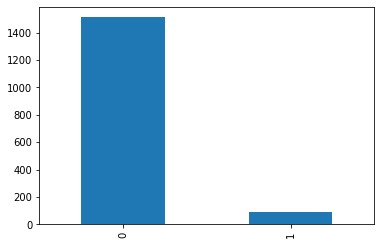

In [ ]:
columns_needed1['Churn(1-Y/0-N)'].value_counts().plot(kind='bar')

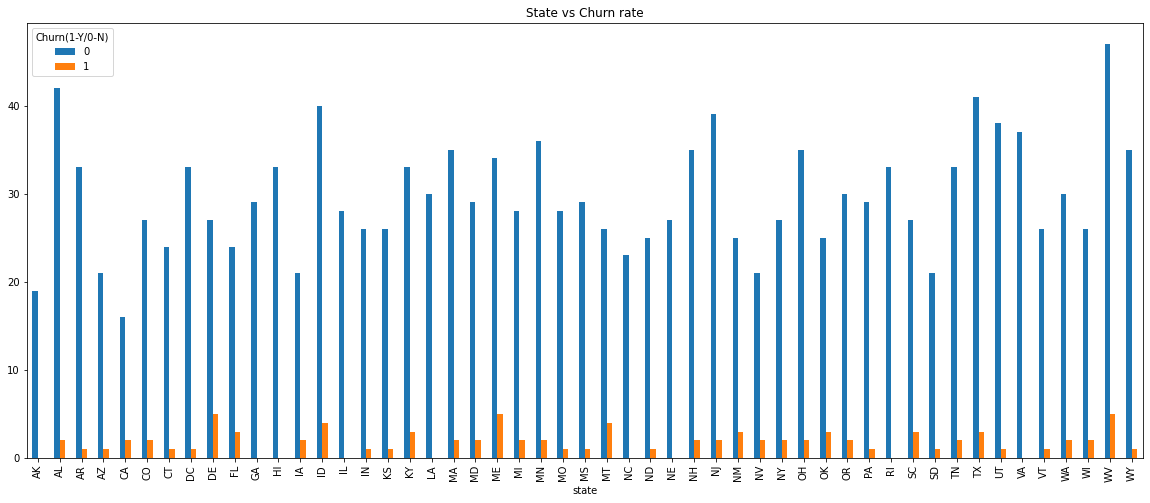

In [ ]:
ax = columns_needed1.groupby(['Churn(1-Y/0-N)','state'])['state'].count().unstack(0).plot.bar(title="State vs Churn rate", figsize=(20,8))

In [ ]:
extracted_col = pred_df["interantional_plans"]
columns_needed1 = columns_needed1.join(extracted_col)

In [ ]:
df2=columns_needed1[columns_needed1['Churn(1-Y/0-N)']==1]['interantional_plans']
print(df2)

32      no
34      no
54      no
60      no
68      no
        ..
1506    no
1529    no
1553    no
1567    no
1571    no
Name: interantional_plans, Length: 89, dtype: object
